In [1]:
import xgboost as xgb
import pandas as pd
import statistics as s
import shap
import numpy as np
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from sklearn import tree as t
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as im
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
wine_df = pd.read_csv(r"C:\Users\moham\Downloads\winequality-red.csv", sep =";")
X = wine_df.iloc[:,:11]
y = wine_df.iloc[:,11:]
y= y-3


In [3]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size = 0.25, random_state = 12)


In [8]:
models = dict()
models['random_for'] = RandomForestClassifier()
#models['xgb'] = xgb.XGBClassifier()
#models['tree'] = t.DecisionTreeClassifier()
#models['svm'] = SVC()
#models['mlp'] = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4), random_state=0)

In [9]:
model_stack = list()
model_stack.append(('ranFor', RandomForestClassifier()))
model_stack.append(('xgb', xgb.XGBClassifier()))
model_stack.append(('dt', t.DecisionTreeClassifier()))
model_stack.append(('svm', SVC()))
model_stack.append(('mlp', MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4), random_state=0)))

# Meta modèle
meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=model_stack, final_estimator=meta_model, cv=5)

In [29]:
model_result = {}
shap_values = []
for name,model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    model_result[name] =scores
    model.fit(X_train, y_train)
    shap_explainer = shap.TreeExplainer(model)
    shap_values = shap_explainer.shap_values(X)
    print('>%s %.3f (%.3f)' % (name, s.mean(scores), np.std(scores)))



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


>random_for 0.707 (0.030)


In [24]:
stacking_model

StackingClassifier(cv=5,
                   estimators=[('ranFor', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=No...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('dt', DecisionTreeClassifier()), ('svm', SVC()),
                               ('mlp',
                                MLPClassifier(hidden_layer_sizes=4,
                                              random_state=0,
                                              solver='lbfgs'))],
                   final_estimator=LogisticRegression())

In [25]:
meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=model_stack, final_estimator=meta_model, cv=5)

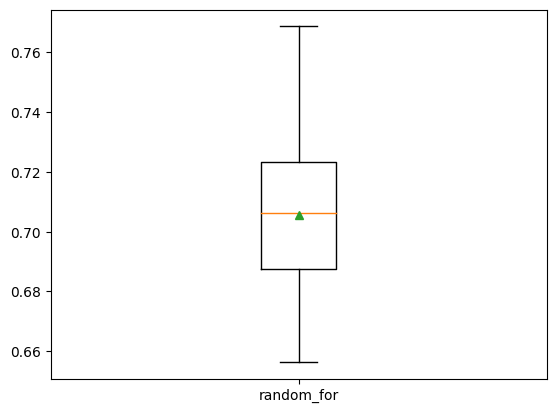

In [13]:

plt.boxplot(model_result.values(), labels=model_result.keys(), showmeans=True)
plt.show()



In [26]:
len(shap_values)

6

In [27]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(stacking_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
len(shap_values[0])

1599

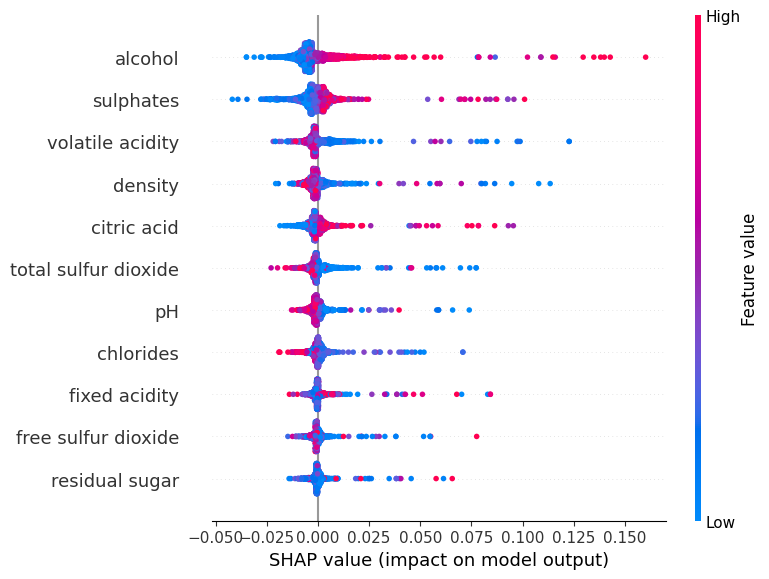

In [34]:
shap.summary_plot(shap_values[5], X, plot_type = 'dot' )